In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [8]:
warnings.filterwarnings('ignore')

In [11]:
class myGamma(object):
    # Note: according to wiki
    # gamma has three different forms, 
    # a, b and k, theta
    # scipy here adopt k, theta, so k=a, theta = 1/b
    
    def __init__(self, a, b, mu):  # key, we have to know mu 
        self.a = a
        self.b = b
        self.mu = mu

    # Bayesian conjugate parameter update
    def update(self, data):
        n, s2 = len(data), np.power((data-self.mu), 2)  # the variance is data - mu
        self.a += n/2
        self.b += np.sum(s2)/2

    def rvs(self, size):
        lamda =  st.gamma(a=self.a, scale=1/self.b).rvs(size)
        return np.sqrt(1/lamda)

    # according to wiki, if x ~ gamma(k, theta), 1/x ~ inv-gamma(k, 1/theta)
    def pdf(self, x):
        return st.invgamma(a=self.a, scale=self.b).pdf(x)

In [4]:
data = st.norm(loc=0, scale=3).rvs(100)
f = myGamma(1, 1, 0)
f.update(data)
y = f.rvs(100)
print(y.mean())
print(f.a, f.b)

3.1219221289102257
51.0 490.0822284054669 22.13780089361784


<AxesSubplot:ylabel='Density'>

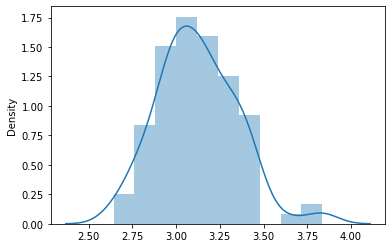

In [9]:
sns.distplot(y)

随着采样数据的越来越多，概率分布越来越靠近var=9

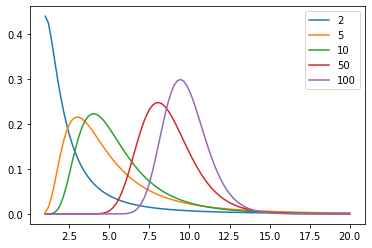

In [12]:
ns = [2, 5, 10, 50, 100]
x = np.linspace(1, 20, 100)
for i in ns:
    f = myGamma(1, 1, 0)
    f.update(data[:i])
    plt.plot(x, f.pdf(x), label=str(i))
plt.legend()